# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_excel('geo_comment.xlsx')

In [4]:
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


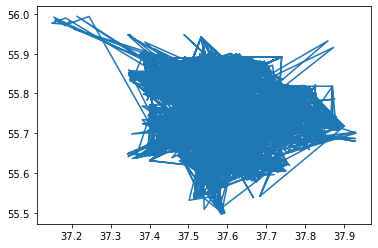

In [5]:
plt.plot(data['x'], data['y'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70382 entries, 0 to 70381
Data columns (total 6 columns):
Unnamed: 0       70382 non-null int64
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ MB


In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [8]:
model=KMeans(n_clusters=5)
X_=data[['x','y']]

In [9]:
klasters=model.fit_predict(X_)

In [10]:
klasters

array([3, 3, 2, ..., 0, 0, 0])

In [11]:
X2_=X_

In [12]:
X2_['Kl']=klasters

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
X2_.head()

,x,y,Kl
0,37.612416,55.777454,3
1,37.612416,55.777454,3
2,37.603298,55.742108,2
3,37.558526,55.728758,2
4,37.566431,55.731794,2


In [14]:
#X2_[X2_['Kl']==0]['x']


In [15]:
max(X2_['Kl'])

4

<function matplotlib.pyplot.show(*args, **kw)>

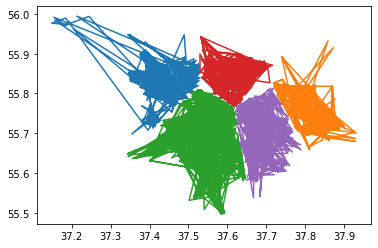

In [16]:
for i in range(0,max(X2_['Kl'])+1):
    plt.plot(X2_[X2_['Kl']==i]['x'],X2_[X2_['Kl']==i]['y'])
plt.show

с учетом голосов отдельно за и против


<function matplotlib.pyplot.show(*args, **kw)>

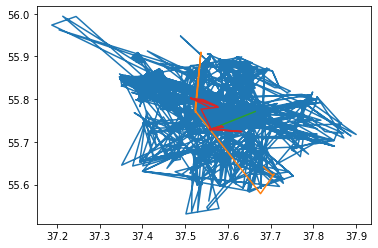

In [17]:
XG1=data[data['comment_class']==1]
XG1=XG1[['x','y','multiplier']]
model=KMeans(n_clusters=4)
klastersG=model.fit_predict(XG1)
XG1['Kl']=klastersG
for i in range(0,max(XG1['Kl'])+1):
    plt.plot(XG1[XG1['Kl']==i]['x'],XG1[XG1['Kl']==i]['y'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

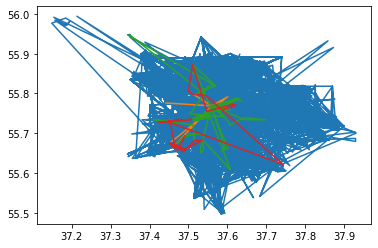

In [18]:
XG1=data[data['comment_class']==-1]
XG1=XG1[['x','y','multiplier']]
model=KMeans(n_clusters=4)
klastersG=model.fit_predict(XG1)
XG1['Kl']=klastersG
for i in range(0,max(XG1['Kl'])+1):
    plt.plot(XG1[XG1['Kl']==i]['x'],XG1[XG1['Kl']==i]['y'])
plt.show

честно признаюсь, что я не понял результата кластеризации с учетом количества голосов!!!(

Далее подбор оптимального кол кластеров для первого простого набора без учета кол голосов

In [19]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_, )
    k_inertia.append(clf_kmeans.inertia_)

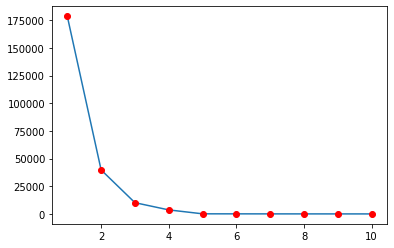

In [20]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

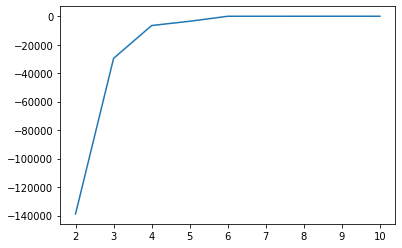

In [21]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

In [22]:
diff_r = diff[1:] / diff[:-1]

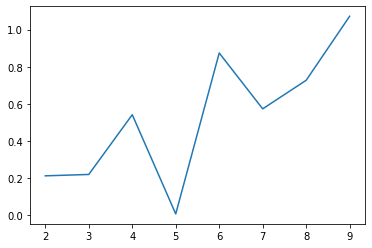

In [23]:
plt.plot(ks[1:-1], diff_r)

In [24]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

5